## Loan Approval Prediction & Credit Risk Analysis


### Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


### Data Loading

In [9]:
data_df = pd.read_csv('Loan.csv')
data_df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


### Data Understanding & Cleaning
#### The results below show that th dataset is of the highest Quality as it has no nans, duplicates and appropriate data fields types. However, dataset description shows some outliers present in the data. Also the label class in imbalanced showing only 23.9% loan approval rate 

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [14]:
print(data_df.isna().sum()) # Number of missing values

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [ ]:
data_df.describe() ## Dataset Description

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
data_df.select_dtypes(include='object').columns ## columns of object type


Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [ ]:
data_df.select_dtypes(include=['float64','int64']).columns ## columns of numerical type


Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

In [26]:
data_df.duplicated().sum() ## checking for duplicate rows

np.int64(0)

### Exploratory Data Analysis

#### 1. Loan Approval Rate based on different Sectors


In [62]:
# Overall Loan Approval Rate
approval_rate = data_df['LoanApproved'].mean()
print(f"Overall Loan Approval Rate: {approval_rate:.2%}")


Overall Loan Approval Rate: 23.90%


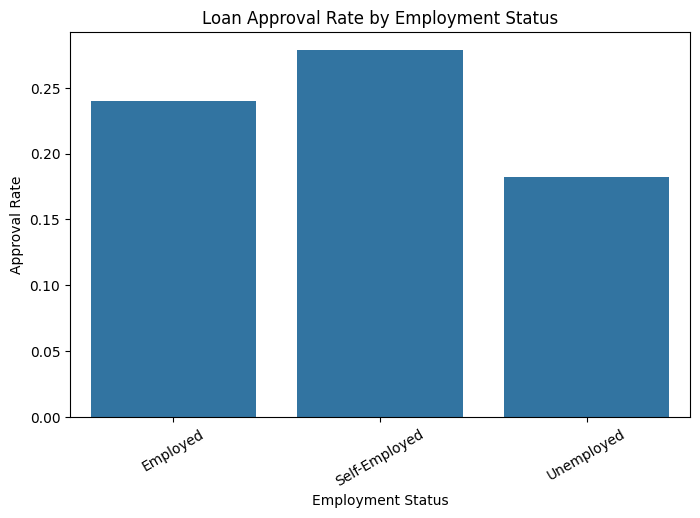

In [53]:
approval_emp = (
    data_df
    .groupby('EmploymentStatus')['LoanApproved']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=approval_emp,
    x='EmploymentStatus',
    y='LoanApproved'
)
plt.title('Loan Approval Rate by Employment Status')
plt.ylabel('Approval Rate')
plt.xlabel('Employment Status')
plt.xticks(rotation=30)
plt.show()


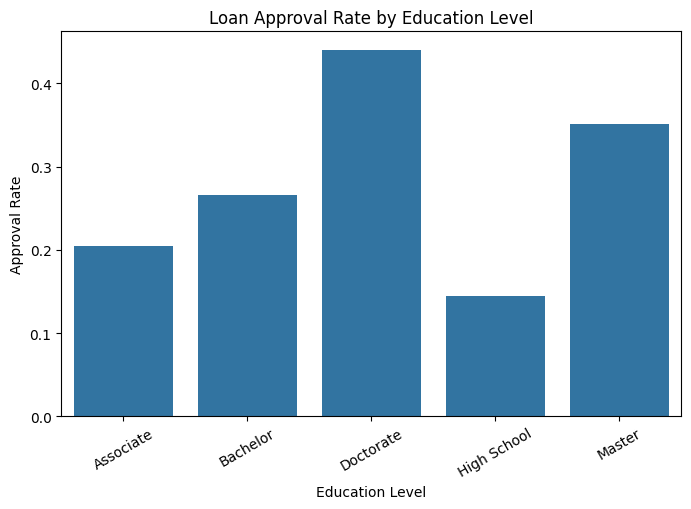

In [55]:
approval=(
    data_df.groupby('EducationLevel')['LoanApproved'].mean().reset_index())

plt.figure(figsize=(8,5))
sns.barplot(data=approval,x='EducationLevel',y='LoanApproved')
plt.title('Loan Approval Rate by Education Level')
plt.ylabel('Approval Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=30)
plt.show()

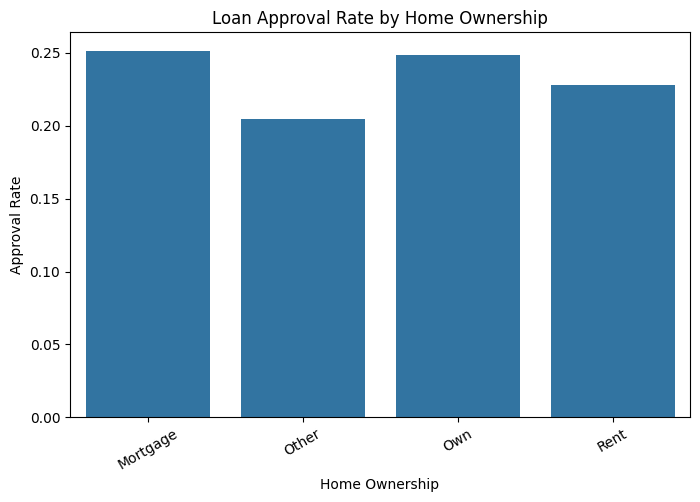

In [57]:
approval_rate=(data_df.groupby('HomeOwnershipStatus')['LoanApproved'].mean().reset_index())

plt.figure(figsize=(8,5))
sns.barplot(data=approval_rate,x='HomeOwnershipStatus',y='LoanApproved')
plt.title('Loan Approval Rate by Home Ownership')
plt.ylabel('Approval Rate')
plt.xlabel('Home Ownership')
plt.xticks(rotation=30)
plt.show()

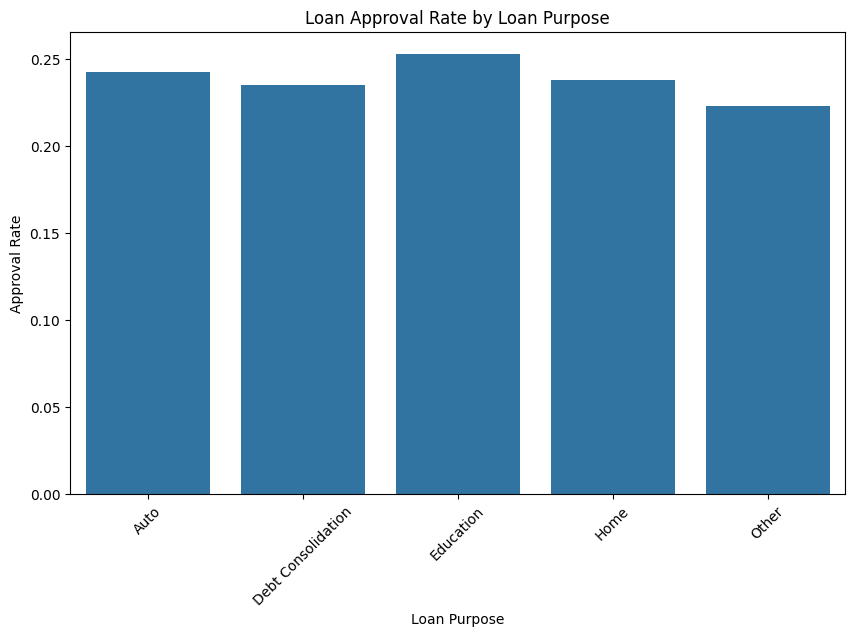

In [58]:
approval_purpose = (
    data_df.groupby('LoanPurpose')['LoanApproved'].mean().reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=approval_purpose,
    x='LoanPurpose',
    y='LoanApproved'
)
plt.title('Loan Approval Rate by Loan Purpose')
plt.ylabel('Approval Rate')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.show()


#### 2. Impact of Different Factors like Credit Score, Debt-to-income ratio etc

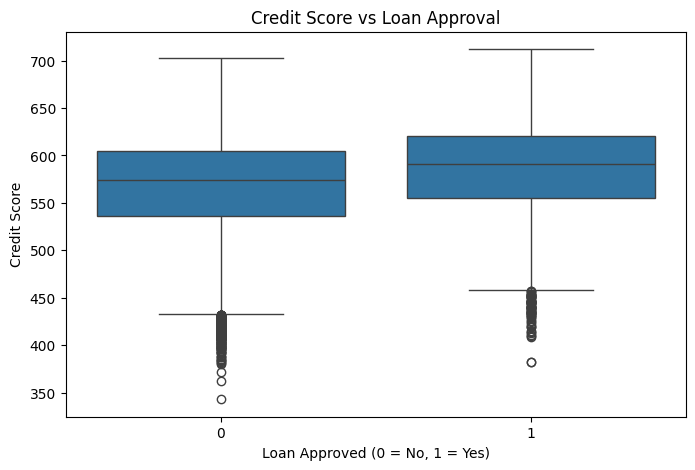

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LoanApproved', y='CreditScore', data=data_df)
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Credit Score')
plt.title('Credit Score vs Loan Approval')
plt.show()


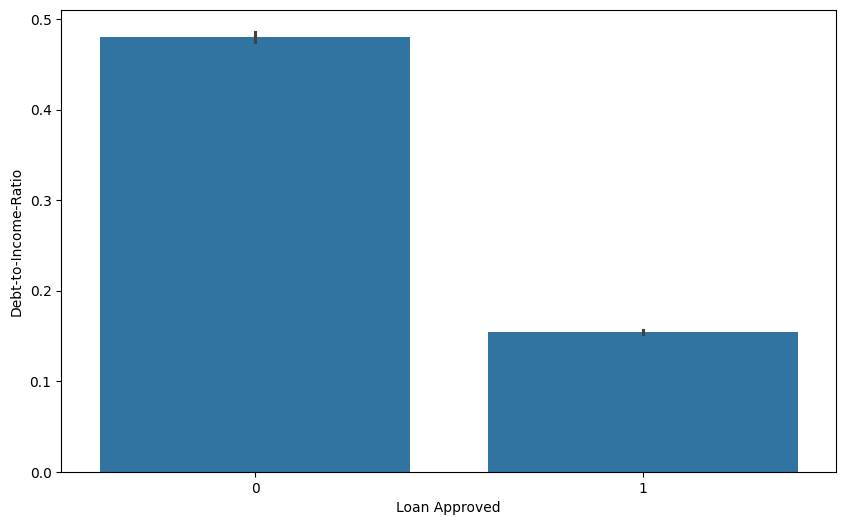

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_df,x='LoanApproved',y='TotalDebtToIncomeRatio')
plt.xlabel('Loan Approved')
plt.ylabel('Debt-to-Income-Ratio')
plt.show()